In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pickle

In [96]:
file_path = '../data/lacentrale-dev-clean.csv'
car = pd.read_csv(file_path)
car.describe()

,price,energy,gear_box,kilometers,year,zip_code,cylinder,horsepower
count,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000
mean,29084.944324,0.755027,0.468174,69907.688051,2018.986704,54.075453,6.505734,155.352734
std,20379.518901,0.835040,0.499028,55413.140714,4.507731,27.534093,30.635160,86.573875
min,420.000000,0.000000,0.000000,1.000000,1960.000000,1.000000,0.500000,0.500000
25%,16710.000000,0.000000,0.000000,26989.000000,2018.000000,31.000000,1.200000,102.000000
50%,24520.000000,1.000000,0.000000,59272.000000,2020.000000,57.000000,1.500000,130.000000
75%,35160.000000,1.000000,1.000000,101920.000000,2022.000000,77.000000,2.000000,180.000000
max,197420.000000,4.000000,1.000000,345168.000000,2024.000000,98.000000,523.000000,740.000000


In [97]:
X = car.drop(['price'], axis=1)
X

,model,energy,gear_box,kilometers,year,zip_code,cylinder,horsepower,brand
0,PORSCHE 911 TYPE 997 CABRIOLET phase 2,0,0,68076.0,2013,61,3.8,530.0,PORSCHE
1,MINI MINI III 5P,0,1,119081.0,2016,76,1.5,102.0,MINI
2,PORSCHE 911 TYPE 993,0,1,184800.0,1999,45,3.6,285.0,PORSCHE
3,RENAULT KADJAR,1,1,42607.0,2021,77,1.5,115.0,RENAULT
4,RENAULT CLIO IV,0,1,143050.0,2016,92,1.2,75.0,RENAULT
...,...,...,...,...,...,...,...,...,...
6012,PEUGEOT 5008 II,1,1,93824.0,2021,10,1.5,130.0,PEUGEOT
6013,VOLKSWAGEN GOLF VIII,0,0,41729.0,2022,10,1.5,150.0,VOLKSWAGEN
6014,DS 3 CROSSBACK,3,0,41157.0,2020,10,50.0,136.0,DS
6015,PEUGEOT 308 II SW,0,1,36853.0,2017,10,1.2,130.0,PEUGEOT


In [98]:
Y = car['price']
Y

0       158590.0
1        16030.0
2       127490.0
3        26400.0
4        10640.0
          ...   
6012     32810.0
6013     36150.0
6014     34030.0
6015     18790.0
6016     44730.0
Name: price, Length: 6017, dtype: float64

In [99]:
encoder = OrdinalEncoder()
X[['model']] = encoder.fit_transform(X[['model']]) 
X[['brand']] = encoder.fit_transform(X[['brand']])
X

,model,energy,gear_box,kilometers,year,zip_code,cylinder,horsepower,brand
0,900.0,0,0,68076.0,2013,61,3.8,530.0,44.0
1,713.0,0,1,119081.0,2016,76,1.5,102.0,39.0
2,895.0,0,1,184800.0,1999,45,3.6,285.0,44.0
3,957.0,1,1,42607.0,2021,77,1.5,115.0,46.0
4,938.0,0,1,143050.0,2016,92,1.2,75.0,46.0
...,...,...,...,...,...,...,...,...,...
6012,847.0,1,1,93824.0,2021,10,1.5,130.0,43.0
6013,1171.0,0,0,41729.0,2022,10,1.5,150.0,56.0
6014,309.0,3,0,41157.0,2020,10,50.0,136.0,15.0
6015,833.0,0,1,36853.0,2017,10,1.2,130.0,43.0


In [100]:
X.to_csv('../data/acentrale-dev-clean-encoded.csv', index=False)

<Axes: >

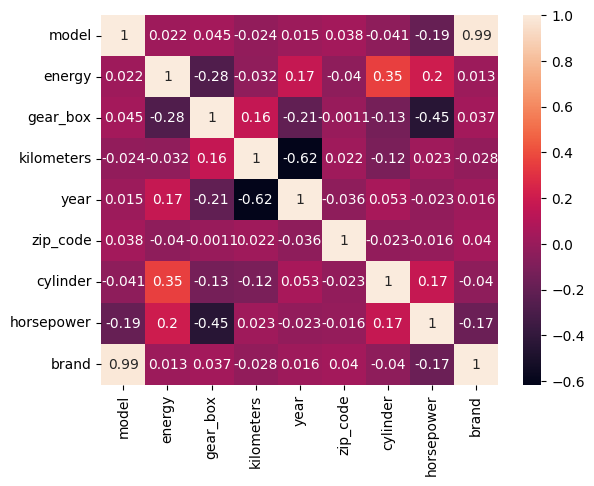

In [101]:
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

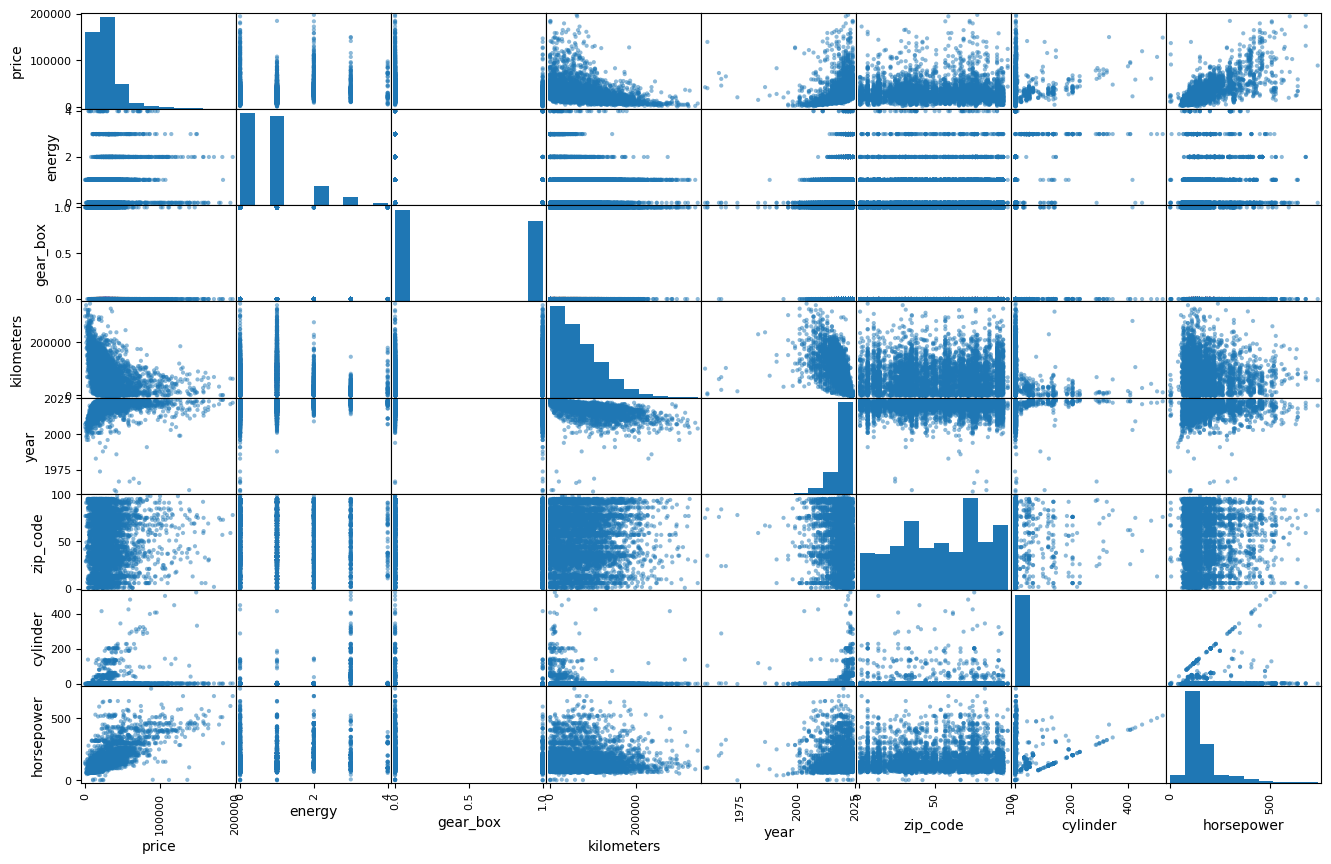

In [102]:
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(car, figsize = (16,10))

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)

In [104]:
# !pip install xgboost
from xgboost.sklearn import XGBRegressor

regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [105]:
y_pred = regressor.predict(X_test)
mean_squared_error(y_pred, Y_test)

69540736.63281088

In [106]:
r2_score(y_pred, Y_test)

0.8183091245631742

In [107]:
pickle.dump(regressor, open('model', 'wb'))

<Axes: >

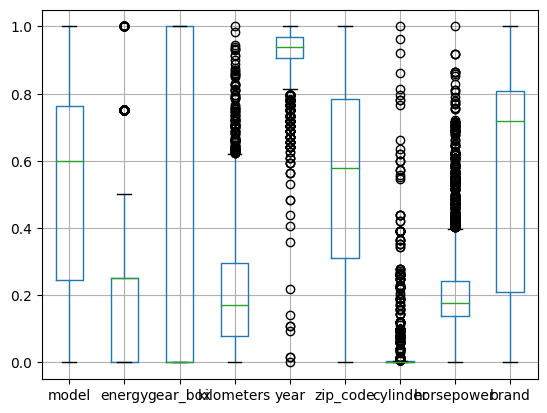

In [116]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(X)
df_minmax = pd.DataFrame(df_minmax, columns=X.columns, index=X.index)
df_minmax.boxplot()

<Axes: >

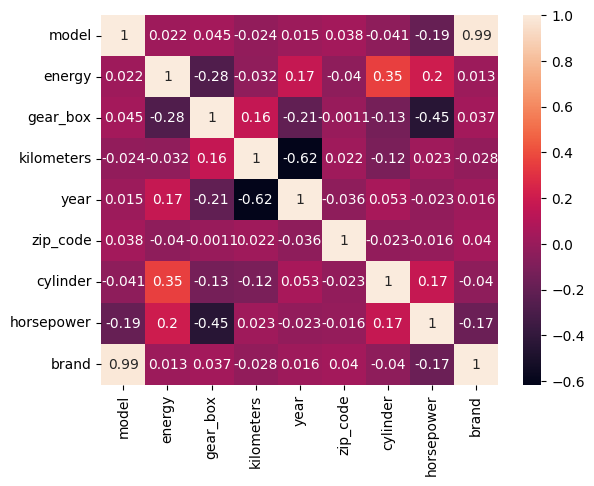

In [117]:
corr = df_minmax.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

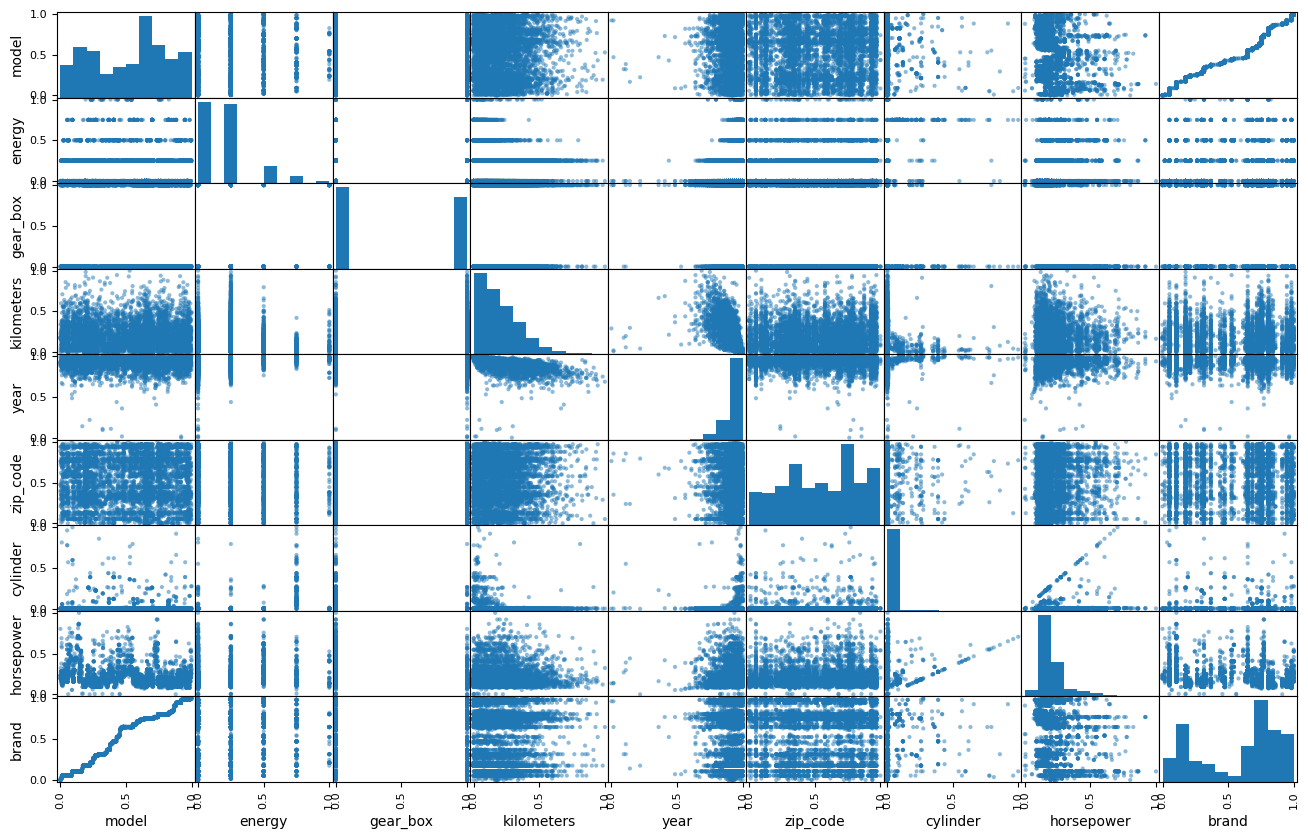

In [118]:
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(df_minmax, figsize = (16,10))

In [123]:
# !pip install xgboost
from xgboost.sklearn import XGBRegressor

X_train, X_test, Y_train, Y_test = train_test_split(df_minmax,Y,test_size=0.33, random_state=42)
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
print(mean_squared_error(y_pred, Y_test))
print(r2_score(y_pred, Y_test))

70123622.48645146
0.8168864970393286
